In [1]:
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
df= pd.read_csv('sasa_dataframe.csv')

In [3]:
#remove unamed columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['Unnamed: 0.1'], axis=1, inplace=True)


In [4]:
df.columns.values

array(['Sequence', 'ProteinID', 'Modifications', 'start', 'end',
       'cleavage_sites', 'Last_AA', 'LastAA_position', 'Cleavage',
       'secondary_structure', 'relative ASA', 'phi', 'psi', 'NH01R',
       'NH01E', 'ONH1', 'ONHE', 'NH2R', 'NO2E', 'ONH2R', 'ONH2E', '-',
       'B', 'E', 'G', 'H', 'I', 'S', 'T', '2 Oxidation (M)',
       '3 Oxidation (M)', 'Acetyl (Protein N-term)',
       'Acetyl (Protein N-term),2 Oxidation (M)',
       'Acetyl (Protein N-term),Oxidation (M)', 'Oxidation (M)',
       'Unmodified', 'res_depth', 'ca_depth', 'SASA'], dtype=object)

In [5]:
df.columns[10:].values

array(['relative ASA', 'phi', 'psi', 'NH01R', 'NH01E', 'ONH1', 'ONHE',
       'NH2R', 'NO2E', 'ONH2R', 'ONH2E', '-', 'B', 'E', 'G', 'H', 'I',
       'S', 'T', '2 Oxidation (M)', '3 Oxidation (M)',
       'Acetyl (Protein N-term)',
       'Acetyl (Protein N-term),2 Oxidation (M)',
       'Acetyl (Protein N-term),Oxidation (M)', 'Oxidation (M)',
       'Unmodified', 'res_depth', 'ca_depth', 'SASA'], dtype=object)

In [6]:
labels= df['Cleavage'] 

In [21]:
features= df.iloc[:,10:]

<AxesSubplot:>

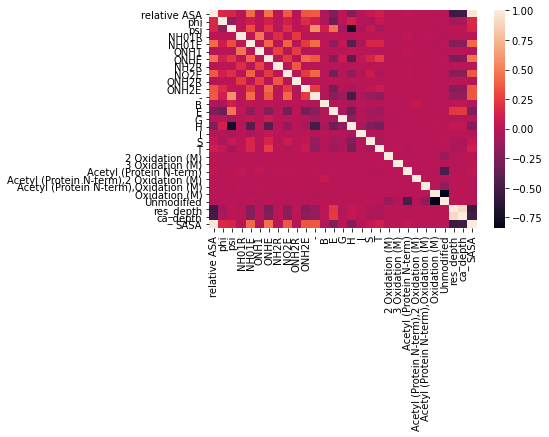

In [22]:
import seaborn as sns
import matplotlib as plt
corr = features.corr()
sns.heatmap(corr, 
xticklabels=corr.columns.values,
yticklabels=corr.columns.values)

In [23]:
print(features.shape)

(42230, 29)


In [28]:
from sklearn.model_selection import train_test_split
X=features
y=np.ravel(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(29,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer='sgd',
metrics=['accuracy'])


In [33]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 240       
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [34]:
len(model.weights)

6

In [35]:
model.fit(X_train, y_train,epochs=8, batch_size=100, verbose=1)

Train on 28294 samples
Epoch 1/8
28294/28294 [==============================] - 0s 15us/sample - loss: 0.4796 - acc: 0.8783
Epoch 2/8
28294/28294 [==============================] - 0s 13us/sample - loss: 0.3686 - acc: 0.8944
Epoch 3/8
28294/28294 [==============================] - 0s 15us/sample - loss: 0.3534 - acc: 0.8944
Epoch 4/8
28294/28294 [==============================] - 1s 18us/sample - loss: 0.3478 - acc: 0.8944
Epoch 5/8
28294/28294 [==============================] - 0s 14us/sample - loss: 0.3445 - acc: 0.8944
Epoch 6/8
28294/28294 [==============================] - 1s 20us/sample - loss: 0.3421 - acc: 0.8944
Epoch 7/8
28294/28294 [==============================] - 0s 13us/sample - loss: 0.3403 - acc: 0.8944
Epoch 8/8
28294/28294 [==============================] - 0s 13us/sample - loss: 0.3390 - acc: 0.8944


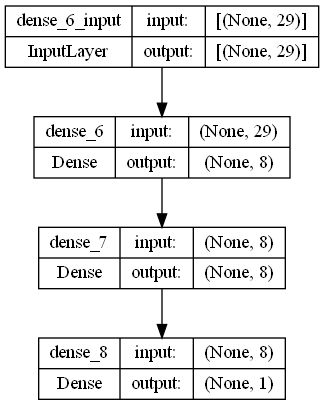

In [36]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [38]:
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

[0.3302178327015566, 0.89803386]


In [17]:
import shap

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.


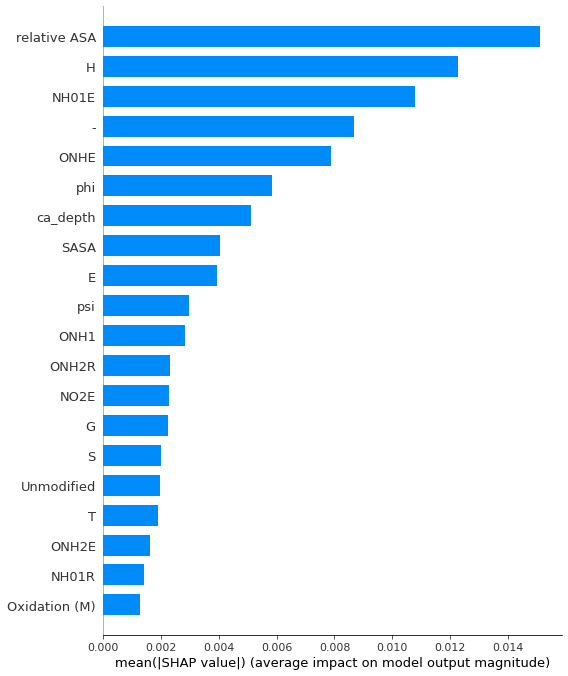

In [43]:
explainer = shap.DeepExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names = features.columns)


In [55]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test[0], feature_names = features.columns)

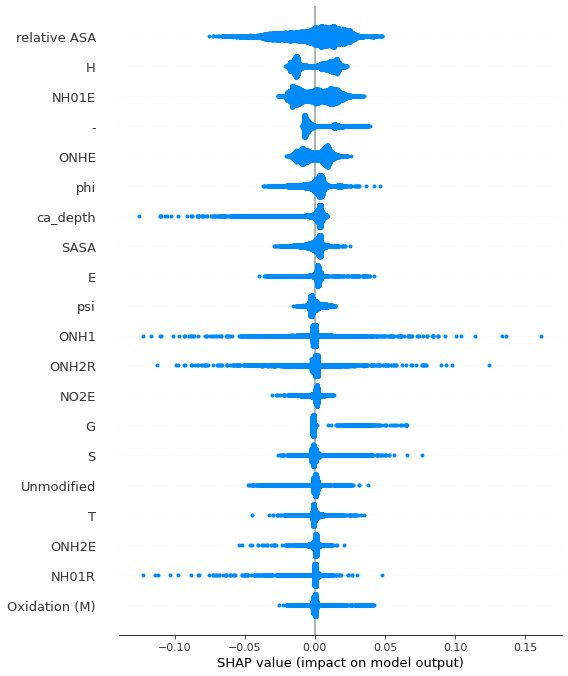

In [56]:
shap.summary_plot(shap_values[0], plot_type = 'dot', feature_names = features.columns)

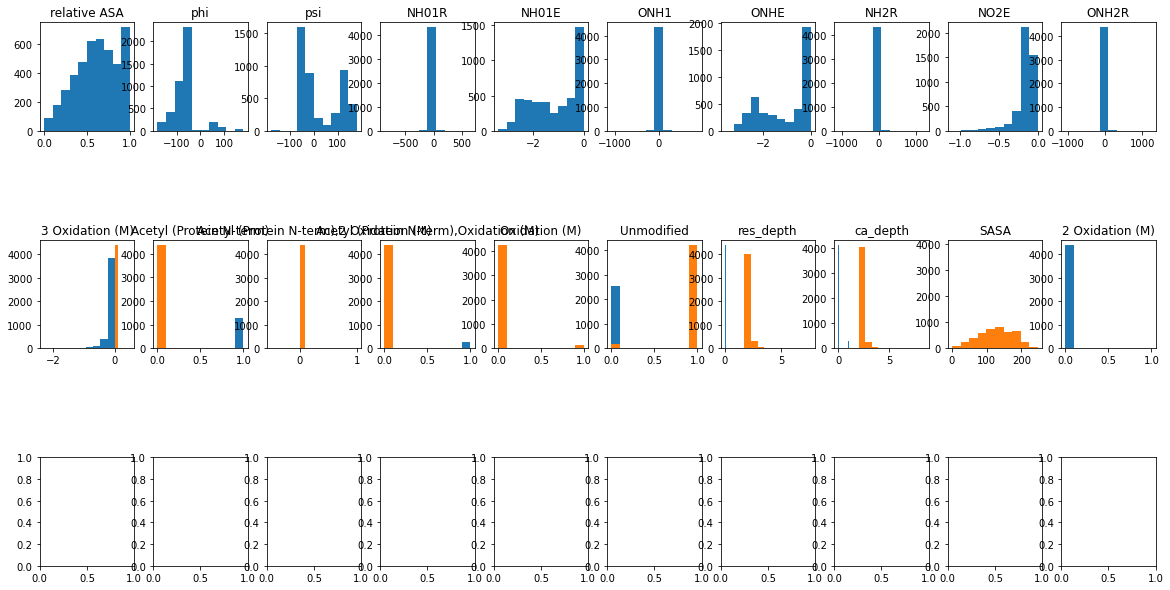

In [ ]:
df1 = pd.DataFrame(df, columns= np.array(df.columns))
cleav = df1.loc[(df1.Cleavage == 1)]
import matplotlib.pyplot as plt
fig, ax= plt.fig, ax = plt.subplots(3,10,figsize=(20, 10) )
i = 0
j=0
for c in cleav.columns[12:]:
    ax[j][i].hist(cleav[c])
    ax[j][i].set_title(c)
    i+=1
    if i==10:
        j=1
        i=0
fig.subplots_adjust(hspace=1, wspace=0.2)
plt.show()



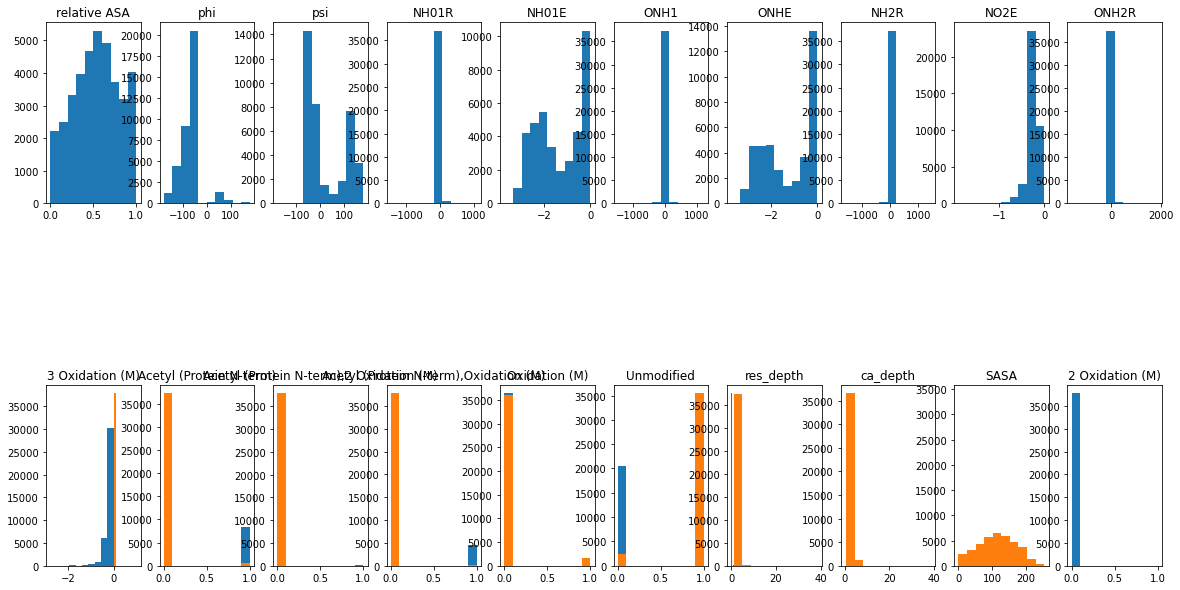

In [ ]:
df2 = pd.DataFrame(df, columns= np.array(df.columns))
cleav1 = df2.loc[(df2.Cleavage == 0)]
import matplotlib.pyplot as plt
fig, ax= plt.fig, ax = plt.subplots(2,10,figsize=(20, 10) )
i = 0
j=0
for c in cleav1.columns[12:]:
    ax[j][i].hist(cleav1[c])
    ax[j][i].set_title(c)
    i+=1
    if i==10:
        j=1
        i=0
fig.subplots_adjust(hspace=1, wspace=0.2)
plt.show()


In [ ]:
from transformers import AutoTokenizer

In [ ]:
tokenizer= AutoTokenizer.from_pretrained('bert-base-cased')

In [ ]:
tokens= tokenizer.encode('N-terminal acetylation')

In [ ]:
tokens

[101, 151, 118, 6020, 20839, 2340, 6840, 102]

In [ ]:
import numpy as np

In [ ]:
Xids = np.zeros((len(X_test), 1))
Xmask = np.zeros((len(X_test), 1))

In [ ]:
Xids.shape

(13936, 1)